# Importing Libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("loan_approval_data.csv")

In [3]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [5]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

# Handling Missing Values

In [6]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include = ["number"]).columns
cat_cols = df.select_dtypes(include = ["object"]).columns
num_imp = SimpleImputer(strategy = "mean")
cat_imp = SimpleImputer(strategy = "most_frequent")



In [7]:
df[num_cols] = num_imp.fit_transform(df[num_cols])
df[cat_cols] = cat_imp.fit_transform(df[cat_cols])

In [8]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

In [9]:
df= df.drop("Applicant_ID", axis = 1)

In [10]:
df

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,Urban,Not Graduate,Male,Unemployed,No
996,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [11]:
print(df[cat_cols].nunique())
cat_cols

Employment_Status    4
Marital_Status       2
Loan_Purpose         5
Property_Area        3
Education_Level      2
Gender               2
Employer_Category    5
Loan_Approved        2
dtype: int64


Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

# EDA(exploratory Data Analysis)

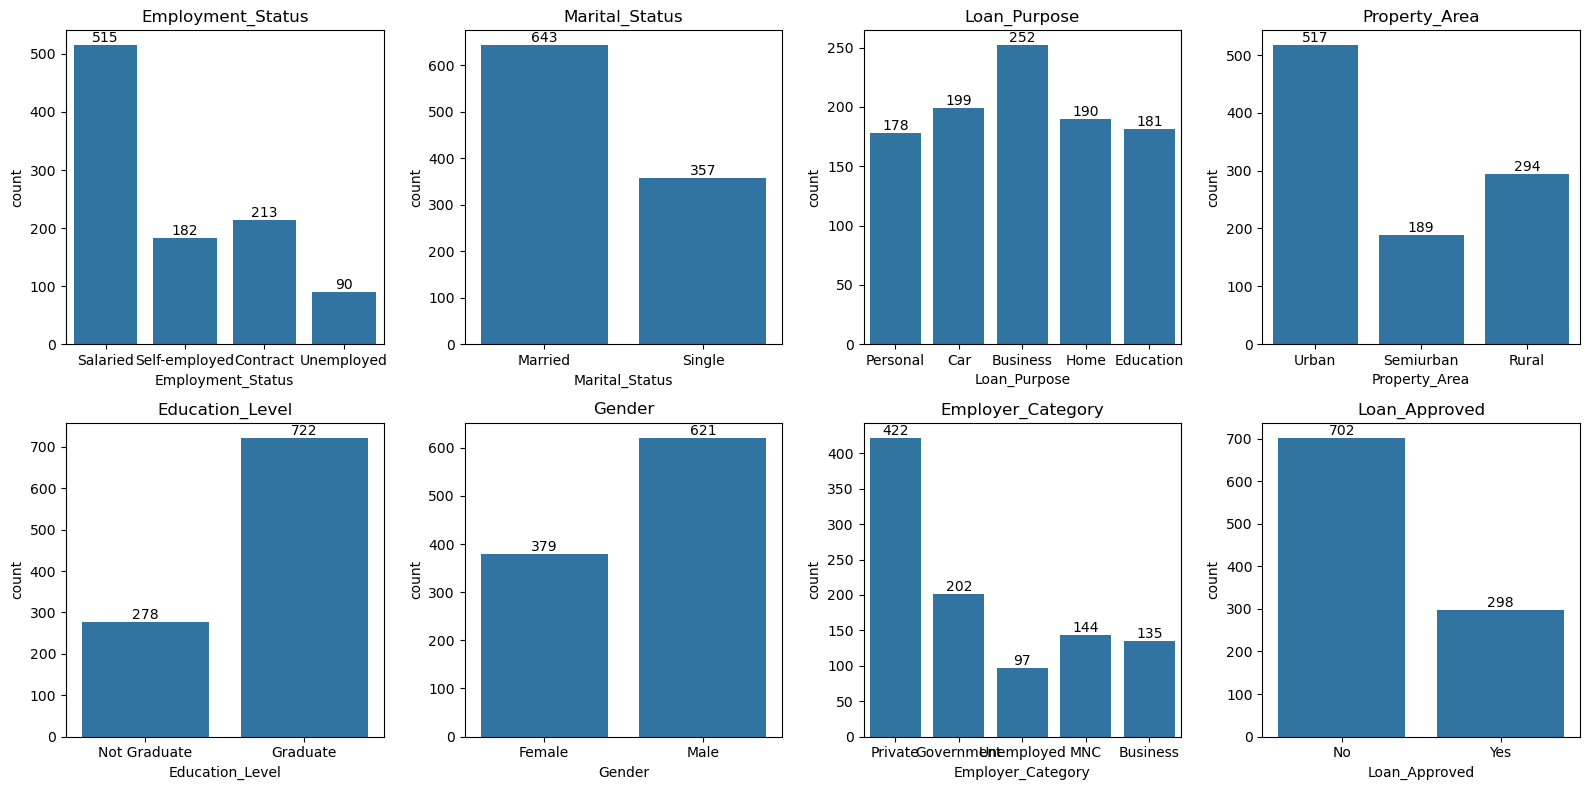

In [12]:
fig, axes = plt.subplots(2,4, figsize= (16,8))
axes = axes.flatten()
cols = ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved']

for i, col in enumerate(cols):
    ax = sns.countplot(data = df, x = col, ax = axes[i])
    ax.bar_label(ax.containers[0])
    ax.set_title(col)

plt.tight_layout()
plt.show()
    

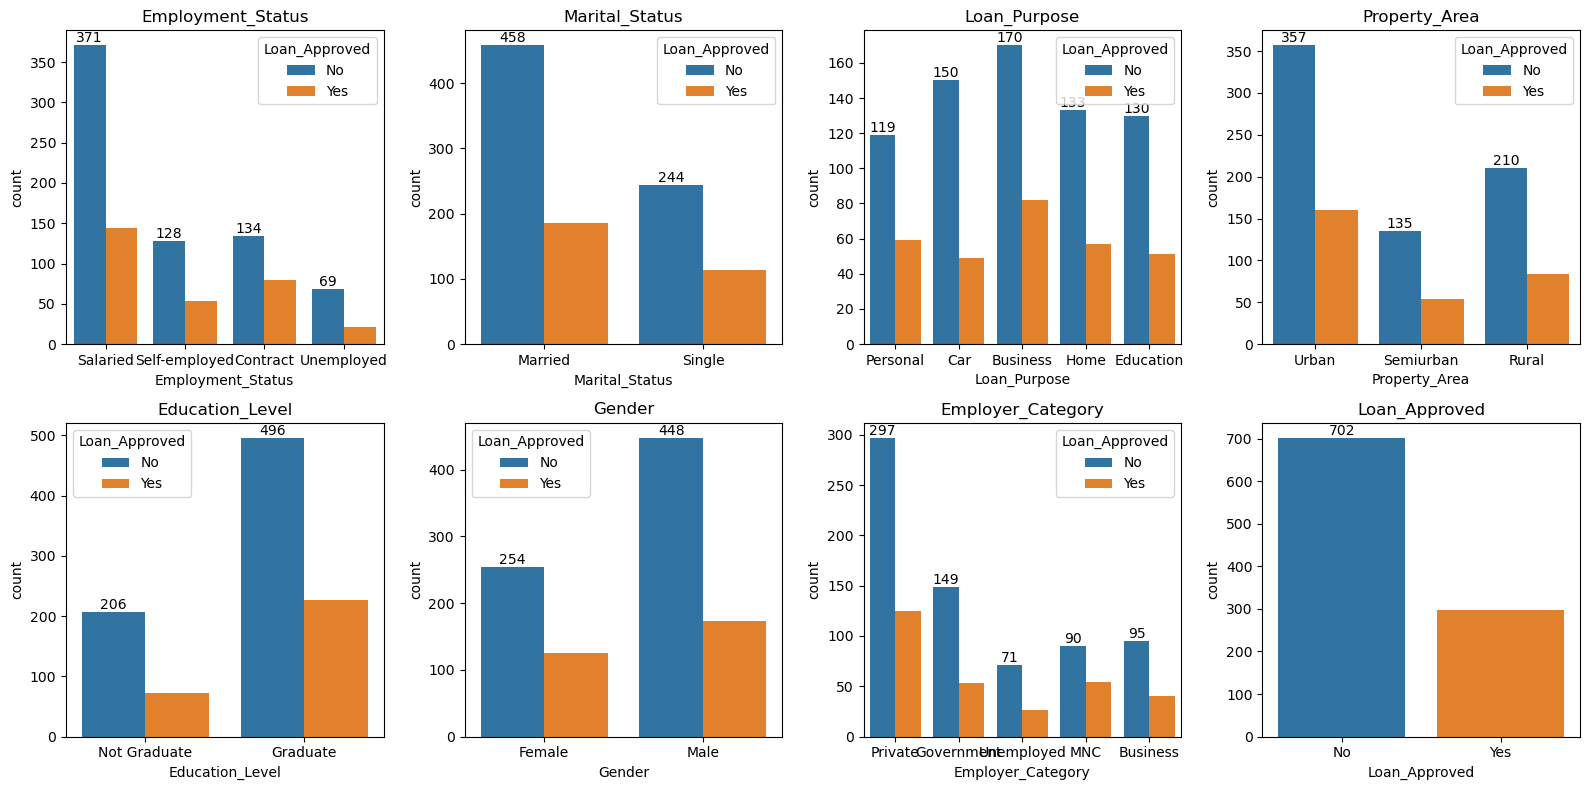

In [13]:
fig, axes = plt.subplots(2,4, figsize= (16,8))
axes = axes.flatten()
cols = ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved']

for i, col in enumerate(cols):
    ax = sns.countplot(data = df, x = col, hue = 'Loan_Approved', ax = axes[i])
    ax.bar_label(ax.containers[0])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [14]:
num_cols = df.select_dtypes(include = ["number"]).columns

In [15]:
df[num_cols].describe()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,4933.339492,2868.563488,10.857445,1.077058,69.537662,1.370603,0.140683,5712.189236,13982.086562,11212.555805,23.630794
min,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,6857.000000,2701.250000,31.000000,1.000000,618.000000,1.000000,0.230000,4964.000000,13166.000000,10478.250000,24.000000
50%,10852.571579,5082.455789,39.971579,1.237368,676.033684,2.000000,0.347263,9940.452632,24802.792632,20522.825263,48.000000
75%,14973.250000,7452.750000,49.000000,2.000000,735.000000,3.000000,0.470000,14784.750000,36396.000000,29683.250000,72.000000
max,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


<Axes: xlabel='Applicant_Income', ylabel='Count'>

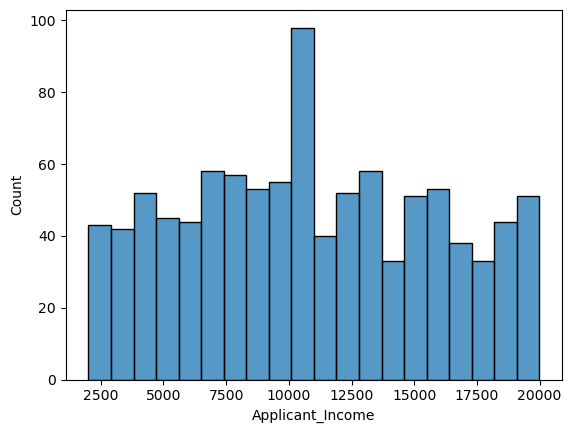

In [16]:
# analyze income
sns.histplot(data = df, x = "Applicant_Income", bins = 20)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

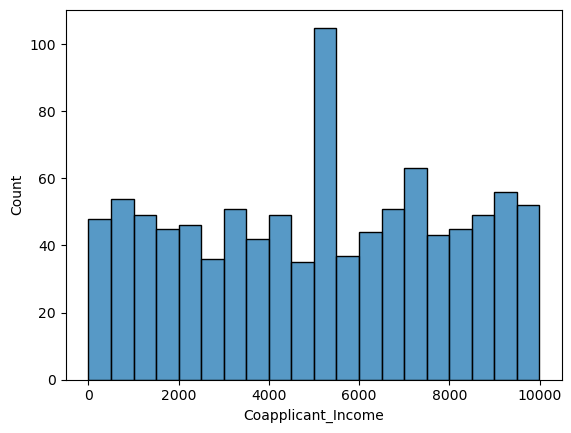

In [17]:
sns.histplot(data = df, x = "Coapplicant_Income", bins = 20)

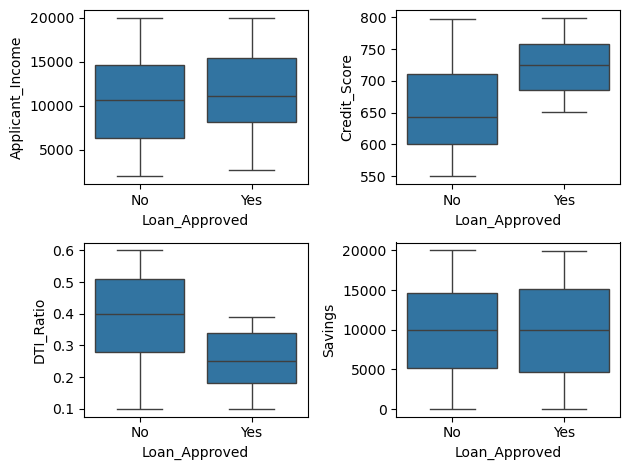

In [18]:
fig, axes = plt.subplots(2,2)
sns.boxplot(ax=axes[0,0], data = df, x = "Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax=axes[0,1], data = df, x = "Loan_Approved", y = "Credit_Score")
sns.boxplot(ax=axes[1,0], data = df, x = "Loan_Approved", y = "DTI_Ratio")
sns.boxplot(ax=axes[1,1], data = df, x = "Loan_Approved", y = "Savings")

plt.tight_layout()

In [19]:
num_cols

Index(['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

# Encoding

In [20]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [21]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

In [22]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [23]:
cols =["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]
ohe = OneHotEncoder(drop = "first", sparse_output=False, handle_unknown='ignore')
ohe_encoded = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(ohe_encoded,  columns = ohe.get_feature_names_out(cols), index=df.index)
df = pd.concat([df.drop(columns = cols),encoded_df], axis = 1)

In [24]:
df.head()


,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


df.info()

# Train_Test_Split & Feature_Scaling

In [25]:
df.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Education_Level',
       'Loan_Approved', 'Employment_Status_Salaried',
       'Employment_Status_Self-employed', 'Employment_Status_Unemployed',
       'Marital_Status_Single', 'Loan_Purpose_Car', 'Loan_Purpose_Education',
       'Loan_Purpose_Home', 'Loan_Purpose_Personal', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Gender_Male', 'Employer_Category_Government',
       'Employer_Category_MNC', 'Employer_Category_Private',
       'Employer_Category_Unemployed'],
      dtype='object')

In [26]:
x = df.drop("Loan_Approved", axis = 1)
y = df["Loan_Approved"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
x_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]])

# Training Model and Evaluation

## Logistic Regression

In [30]:
# Train Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)
y_pred = log_model.predict(x_test_scaled)

# Model Evaluation

print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)
y_pred = knn_model.predict(x_test_scaled)

# Model Evaluation

print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.6274509803921569
Recall:  0.5245901639344263
F1 score:  0.5714285714285714
Accuracy:  0.76
CM:  [[120  19]
 [ 29  32]]


## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
y_pred = nb_model.predict(x_test_scaled)

# Model Evaluation

print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 score:  0.7692307692307693
Accuracy:  0.865
CM:  [[128  11]
 [ 16  45]]


# Naive Bayes is the Best Model based on the precision

# Feature Engineering

<Axes: >

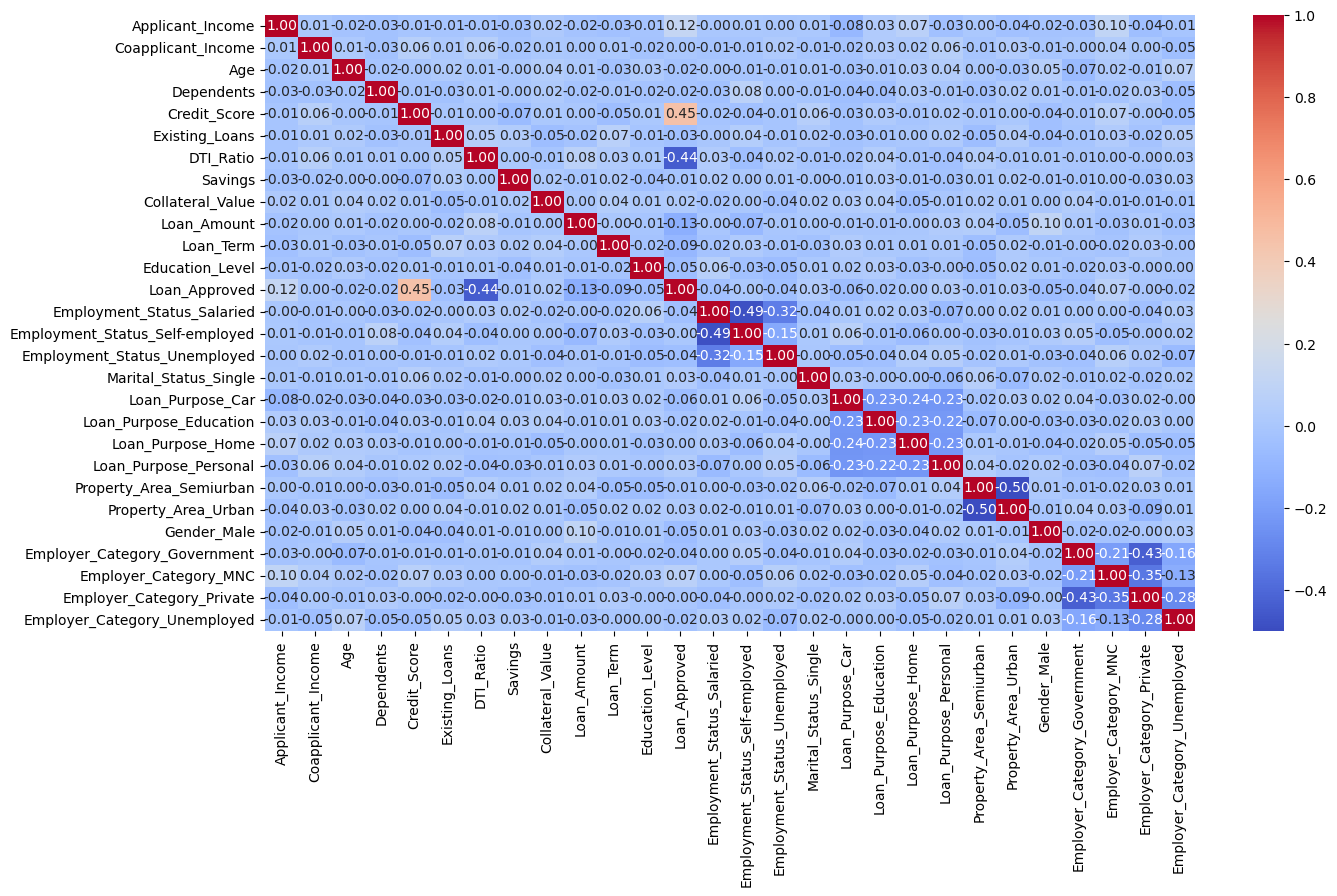

In [33]:
# Correlation Heatmap
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()

plt.figure(figsize = (15,8))
sns.heatmap(
    corr_matrix,
    fmt =".2f",
    annot = True,
    cmap = "coolwarm"
)

In [34]:
num_cols.corr()["Loan_Approved"].sort_values(ascending = False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

In [42]:
# add or transform features

df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

X = df.drop(columns = ["Credit_Score", "DTI_Ratio", "Loan_Approved"])
Y = df["Loan_Approved"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [36]:
X_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -3.07231582e-01, -1.29156426e+00, -1.02979529e+00],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -3.07231582e-01, -9.70501983e-01, -8.86224622e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -3.07231582e-01, -9.27359240e-01, -1.27166794e+00],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -3.07231582e-01, -2.03045749e-01,  3.70841797e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -3.07231582e-01, -3.85566650e-01, -8.59842025e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
        -3.07231582e-01, -1.83899409e-01, -6.18537780e-01]])

In [48]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled, Y_train)
Y_pred =knn_model.predict(X_test_scaled)

# Model Evaluation

print("KNN Model")
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print("F1 score: ", f1_score(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("CM: ", confusion_matrix(Y_test, Y_pred))

KNN Model
Precision:  0.62
Recall:  0.5081967213114754
F1 score:  0.5585585585585585
Accuracy:  0.755
CM:  [[120  19]
 [ 30  31]]


In [43]:
 # Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, Y_train)
Y_pred =log_model.predict(X_test_scaled)

# Model Evaluation

print("Logistic Regression Model")
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print("F1 score: ", f1_score(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("CM: ", confusion_matrix(Y_test, Y_pred))

Logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


In [47]:
# Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)
Y_pred =nb_model.predict(X_test_scaled)

# Model Evaluation

print("Naive Bayes Model")
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print("F1 score: ", f1_score(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("CM: ", confusion_matrix(Y_test, Y_pred))

Naive Bayes Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


# Logistic Regression achieved the highest overall accuracy (87.5%).

# Naive Bayes achieved slightly higher precision (0.8036).
